In [1]:
import re
import os
import sys
import inspect
import pandas as pd
os.chdir("..")
from src.info_extactor import InfoExtractor
print(os.getcwd())

/home/erezsc/PycharmProjects/geocore


In [2]:
DATA_PATH = "data/test.csv"

df = pd.read_csv(DATA_PATH, index_col=0)
if "מקום" in df.columns.tolist():
    df.rename(columns={"מקום":"place"}, inplace=True)
df_topics = df[["place"]].astype("str")
os.chdir("src")
ie = InfoExtractor()

In [3]:
df_text = df["place"].astype("str")

In [4]:
df_topics["type"] = df_topics["place"].apply(lambda x: ie.extract_type(x))
df_topics["type"] = df_topics["type"].apply(lambda x: x[0] if len(x) > 0 else None)
df_topics["city"] = df_topics["place"].apply(ie.extract_city)
df_topics["city"] = df_topics["city"].apply(lambda x: None if x == '   ' else x)

In [5]:
df_topics["city"]

0        תל אביב
1        ירושלים
2        תל אביב
3        תל אביב
4           None
          ...   
1535       עפולה
1536      אשקלון
1537        יבנה
1538       עפולה
1539    גבעת זאב
Name: city, Length: 1540, dtype: object

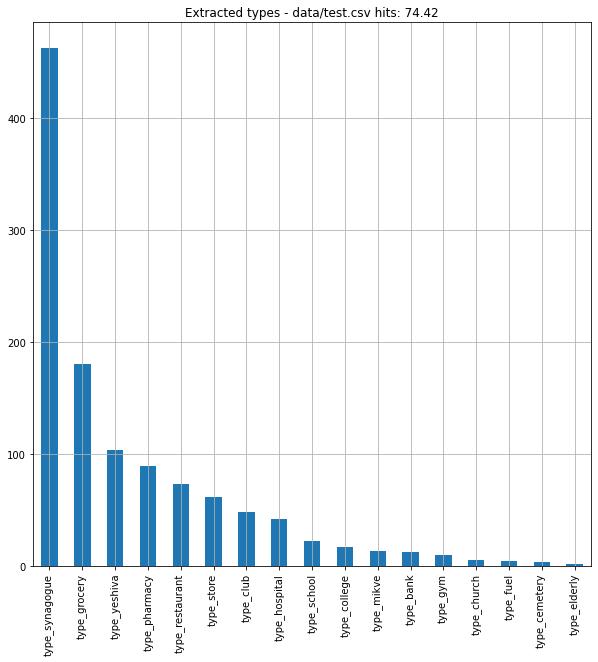

In [6]:
types_agg_df = pd.get_dummies(df_topics[["type"]]).agg("sum").sort_values(ascending=False)
total_extracted_types = types_agg_df.sum()
hit_percentage = "{:.2f}".format(total_extracted_types / len(df_topics) * 100)
types_agg_df.plot.bar(grid=True, figsize=(10,10), title="Extracted types - " + DATA_PATH + " hits: " + hit_percentage)

In [7]:
df_topics.head()

,place,type,city
0,"מועדון ""זוזו"", שדרות רוטשילד 32, תל אביב",club,תל אביב
1,"דיור מוגן ""מגדל נופים"" רחוב הנריטה סאלד 2 ירושלים",elderly,ירושלים
2,"מועדון Sura Mare, רחוב סעדיה גאון 24, תל אביב",club,תל אביב
3,"מועדון ""Sura Mare"", רחוב סעדיה גאון 24, תל אביב",club,תל אביב
4,"אולם ""שבע"" רח' הצפירה 21, ת""א",club,None


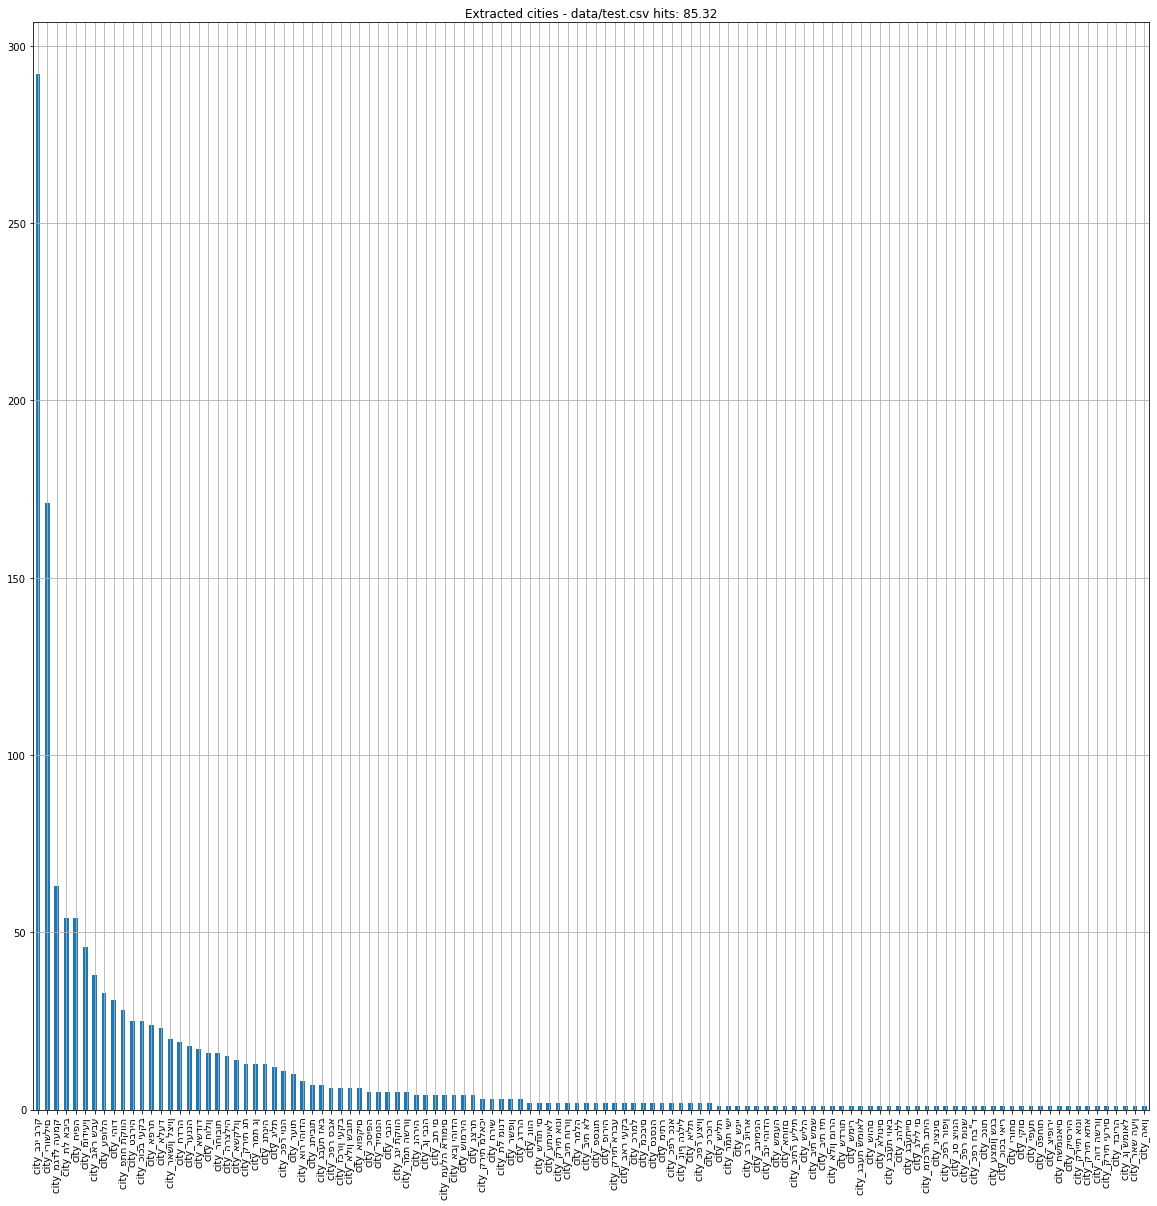

In [8]:
cities_agg_df = pd.get_dummies(df_topics[["city"]]).agg("sum").sort_values(ascending=False)
total_extracted_types = cities_agg_df.sum()
hit_percentage = "{:.2f}".format(total_extracted_types / len(df_topics) * 100)
cities_agg_df.plot.bar(grid=True, figsize=(20,20), title="Extracted cities - " + DATA_PATH + " hits: " + hit_percentage)

In [9]:
df_topics[df_topics["city"].isna()] #failed cities extraction

,place,type,city
4,"אולם ""שבע"" רח' הצפירה 21, ת""א",club,None
5,"ישיבת חב""ד קריית שמואל",yeshiva,None
6,מועדון נוער אור ישראלי,club,None
7,מועדון נוער אור ישראלי,club,None
8,בית חולים וולפסון,hospital,None
...,...,...,...
1501,שופרסל דיל בביג - יקנעם (מושבה),grocery,None
1505,"קופת חולים כללית, עמידר עכו - עכו",pharmacy,None
1506,"בית כנסת- אורייתא, סמוך לרחוב נפתלי - עכו",synagogue,None
1507,מוקד טרם - לוד,pharmacy,None


In [10]:
df_topics[df_topics["type"].isna()]  #failed type extraction

,place,type,city
10,הרב שמעון וינגר ביהוד,None,יהוד
40,מסיבת PURIMAGINE דרך קיבוץ גלויות 45 תל אביב,None,תל אביב
48,"ביהכ""נ הריב""ל - אשדוד",None,אשדוד
53,"ארוחת בוקר במלון דן פנורמה, חיפה",None,חיפה
80,בית- קריאת מגילה ואירוע סעודת פורים - גבעת זאב,None,גבעת זאב
...,...,...,...
1467,מחסן עצים ארזים - באר שבע,None,באר שבע
1468,התבלינים של הדס - קרית אתא,None,קרית אתא
1470,תבליני כהן - טבריה,None,טבריה
1475,לוקווא - בני ברק,None,בני ברק
